In [3]:
import pandas as pd
import numpy as np
from collections import Counter

pd.options.display.max_colwidth = 500

In [4]:
df = pd.read_csv("GACTT_RESULTS_ANONYMIZED_v2.csv")
df["one"] = 1

#Single-choice questions

## Social

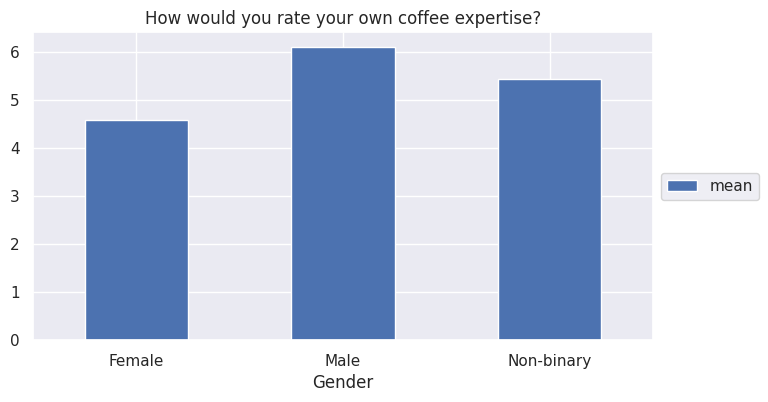

In [34]:
expertise_by_gender = df[["Gender",
                          "Lastly, how would you rate your own coffee expertise?"]]\
                          .groupby("Gender").agg(
                               [np.mean, np.std, "size"]
                          )["Lastly, how would you rate your own coffee expertise?"]
expertise_by_gender["mean_std"] = expertise_by_gender["std"]/ np.sqrt(expertise_by_gender["size"])
expertise_by_gender[["mean"]].plot.bar(rot=0, figsize=(8,4),
                         title="How would you rate your own coffee expertise?")\
                    .legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

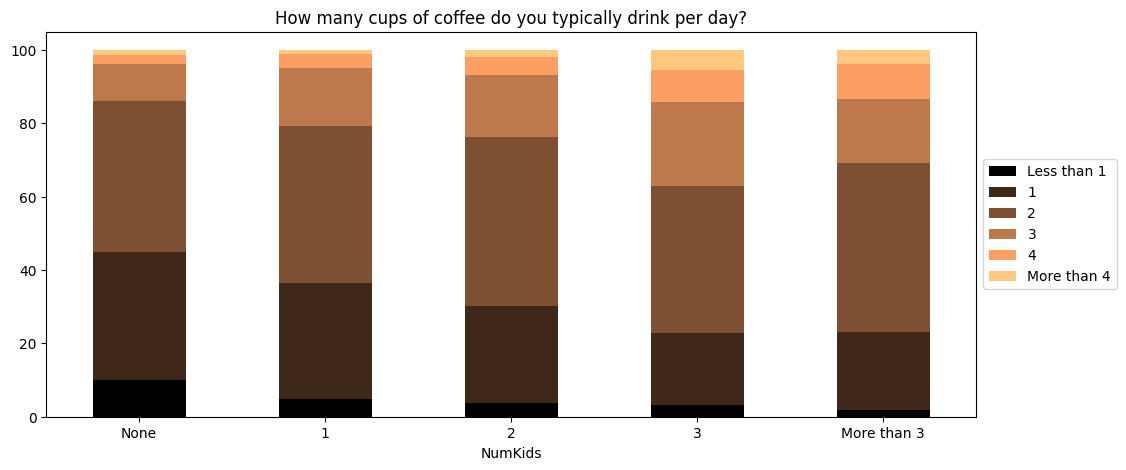

In [6]:
def barplot_percent_stacked(subdf, col_names, x_label, y_label, \
                            x_order=None, y_order=None, title=None, colormap=None):
    subdf.columns = col_names
    subdf_pivot = pd.pivot_table(
        data = subdf,
        values = "one",
        index = x_label,
        columns = y_label,
        fill_value = 0,
        aggfunc = "sum")
    subdf_pivot = (subdf_pivot.T / subdf_pivot.sum(axis=1)).T * 100

    if x_order is not None:
      subdf_pivot = subdf_pivot.loc[x_order, :]
    if y_order is not None:
      subdf_pivot = subdf_pivot.loc[:, y_order]

    subdf_pivot.plot.bar(rot=0, figsize=(12,5), stacked=True,
                         title=title, colormap=colormap)\
                    .legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

barplot_percent_stacked(df[["How many cups of coffee do you typically drink per day?",
                      "Number of Children", "one"]],
                      ["NumCups", "NumKids", "one"], "NumKids", "NumCups",
                        x_order=["None", "1", "2", "3", "More than 3"],
                        y_order = ["Less than 1", "1", "2", "3", "4", "More than 4"],
                        title="How many cups of coffee do you typically drink per day?",
                        colormap="copper")

## Expertise

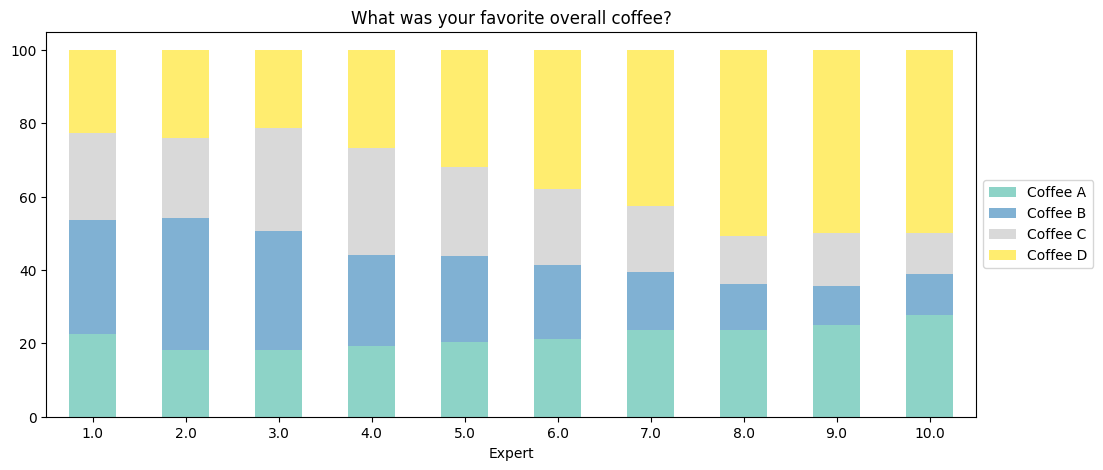

In [7]:
barplot_percent_stacked(df[
    ["Lastly, what was your favorite overall coffee?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["Favorite", "Expert", "one"],
    "Expert", "Favorite", title = "What was your favorite overall coffee?", colormap="Set3")


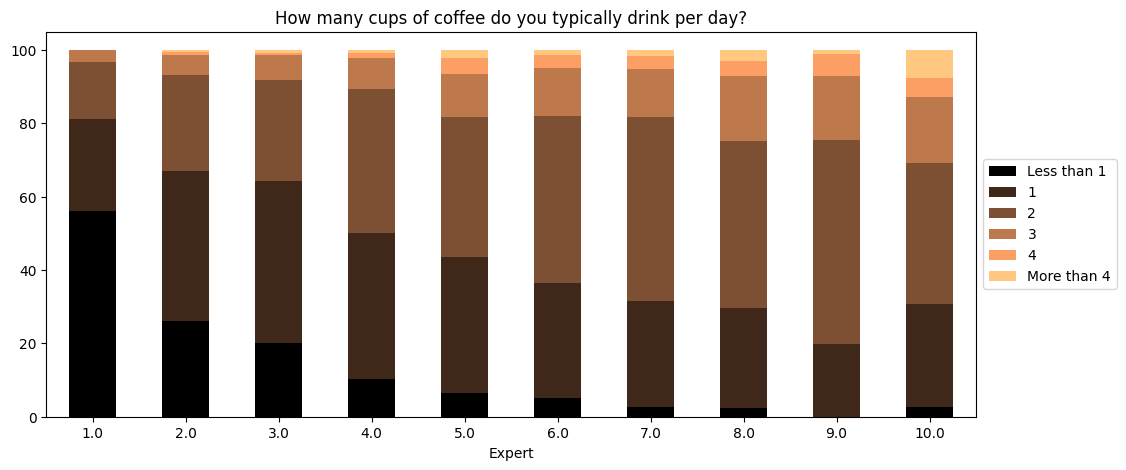

In [8]:
barplot_percent_stacked(df[
    ["How many cups of coffee do you typically drink per day?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["NumCups", "Expert", "one"],
    "Expert", "NumCups",
      y_order = ["Less than 1", "1", "2", "3", "4", "More than 4"],
      title="How many cups of coffee do you typically drink per day?",
      colormap="copper")

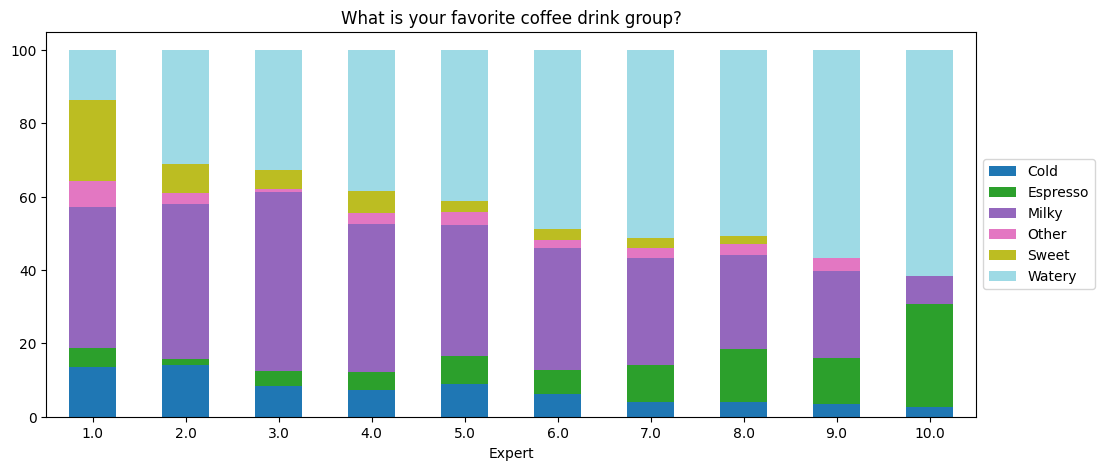

In [9]:
drink_map = {
    "Americano": "Watery",
    "Pourover": "Watery",
    "Regular drip coffee": "Watery",
    "Cold brew": "Cold",
    "Iced coffee": "Cold",
    "Cappuccino": "Milky",
    "Cortado": "Milky",
    "Latte": "Milky",
    "Mocha": "Sweet",
    "Blended drink (e.g. Frappuccino)": "Sweet"
}
df["What is your favorite coffee drink group?"] = df["What is your favorite coffee drink?"].replace(drink_map)

barplot_percent_stacked(df[
    ["What is your favorite coffee drink group?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["Drink", "Expert", "one"],
    "Expert", "Drink", colormap="tab20", title="What is your favorite coffee drink group?")

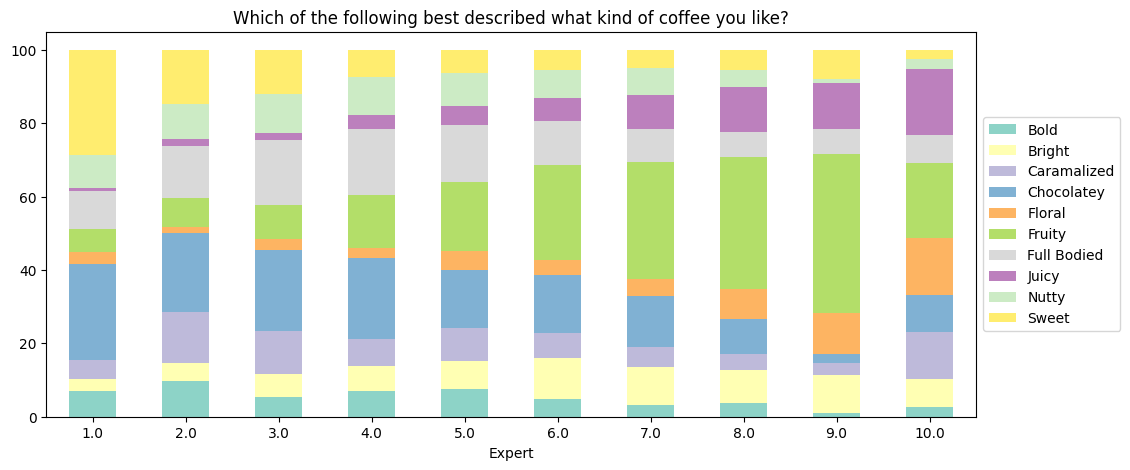

In [10]:
barplot_percent_stacked(df[
    ["Before today's tasting, which of the following best described what kind of coffee you like?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["Favorite kind", "Expert", "one"],
    "Expert", "Favorite kind", colormap="Set3", title="Which of the following best described what kind of coffee you like?")

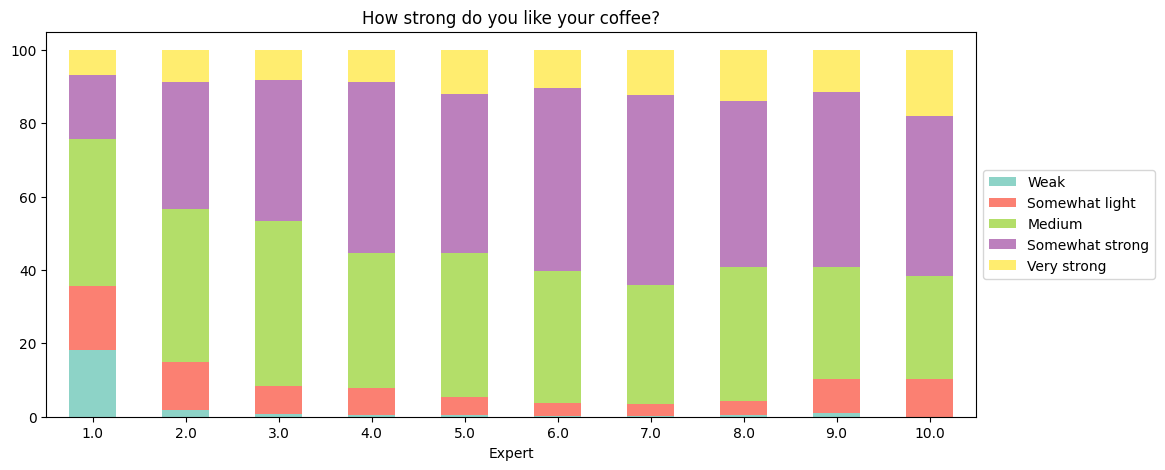

In [11]:
barplot_percent_stacked(df[
    ["How strong do you like your coffee?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["Strength", "Expert", "one"],
    "Expert", "Strength", colormap="Set3", title="How strong do you like your coffee?",
                        y_order=["Weak", "Somewhat light", "Medium", "Somewhat strong", "Very strong"])

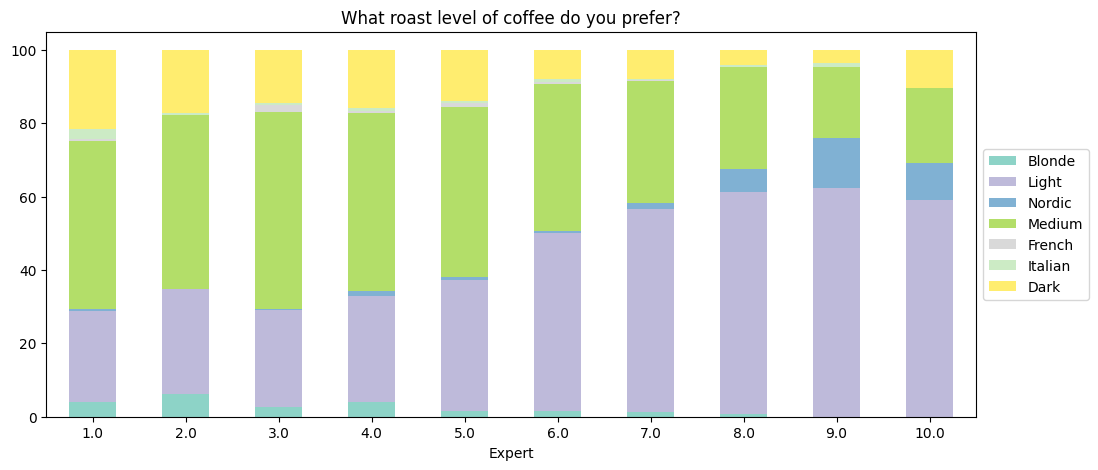

In [12]:
barplot_percent_stacked(df[
    ["What roast level of coffee do you prefer?",
      "Lastly, how would you rate your own coffee expertise?",
     "one"]],
    ["Roast", "Expert", "one"],
    "Expert", "Roast", colormap="Set3", title="What roast level of coffee do you prefer?",
                        y_order=["Blonde", "Light", "Nordic", "Medium", "French", "Italian", "Dark"])

# Multichoice questions

In [13]:
def barplot_percent_stacked_multichoice(df, question, colormap):
  x = "Lastly, how would you rate your own coffee expertise?"
  colname_options = [c for c in df.columns if question in c and not question == c]
  options = [c.split("? ")[1].replace('(','').replace(')','') for c in colname_options]

  df_q = df[[x] + colname_options].copy()
  df_q.rename({co: o for (co,o) in zip(colname_options, options)}, axis=1, inplace=True)
  df_q.rename({x: "Expert"}, axis=1, inplace=True)
  df_grouped = df_q.groupby("Expert").agg(sum) / df_q.groupby("Expert").count() * 100

  df_grouped.plot.bar(rot=0, figsize=(12,5), stacked=True,
                          title=question, colormap=colormap)\
                      .legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

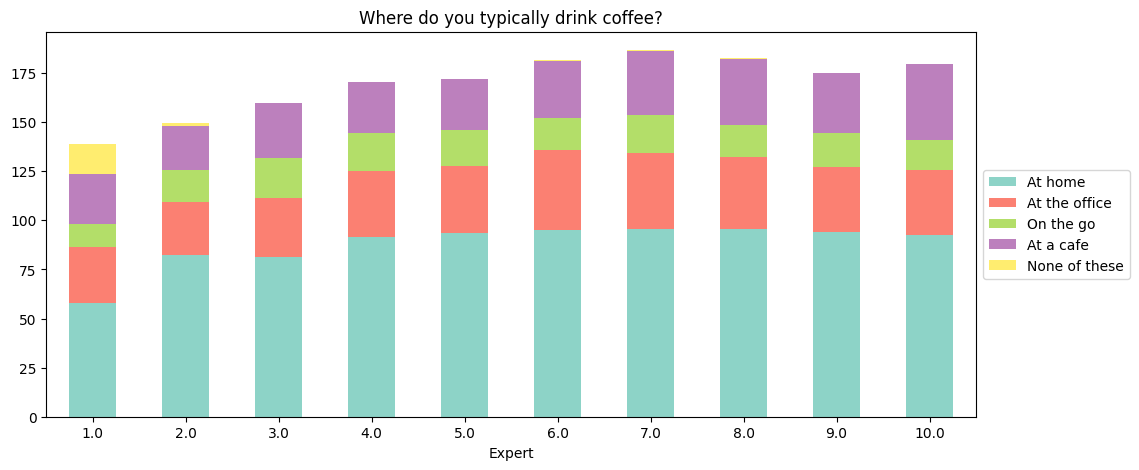

In [14]:
barplot_percent_stacked_multichoice(df, "Where do you typically drink coffee?", colormap="Set3")

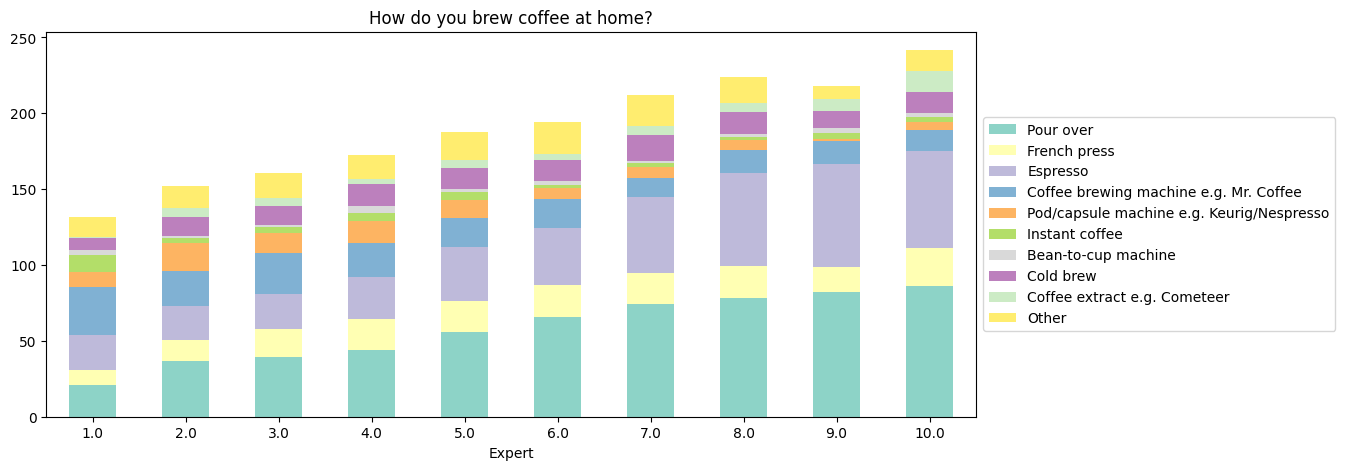

In [15]:
barplot_percent_stacked_multichoice(df, "How do you brew coffee at home?", colormap="Set3")

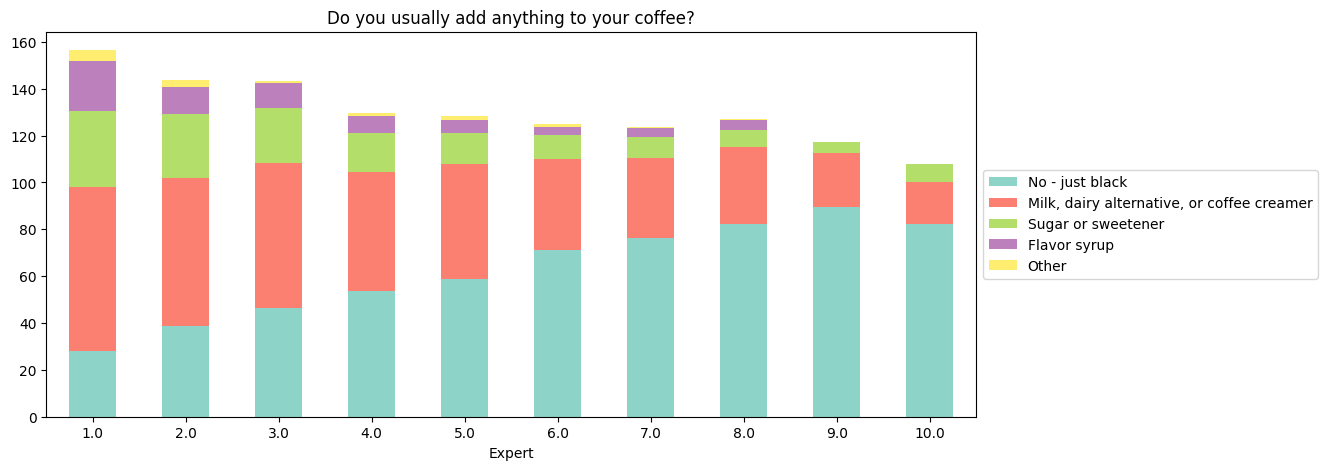

In [16]:
barplot_percent_stacked_multichoice(df, "Do you usually add anything to your coffee?", colormap="Set3")

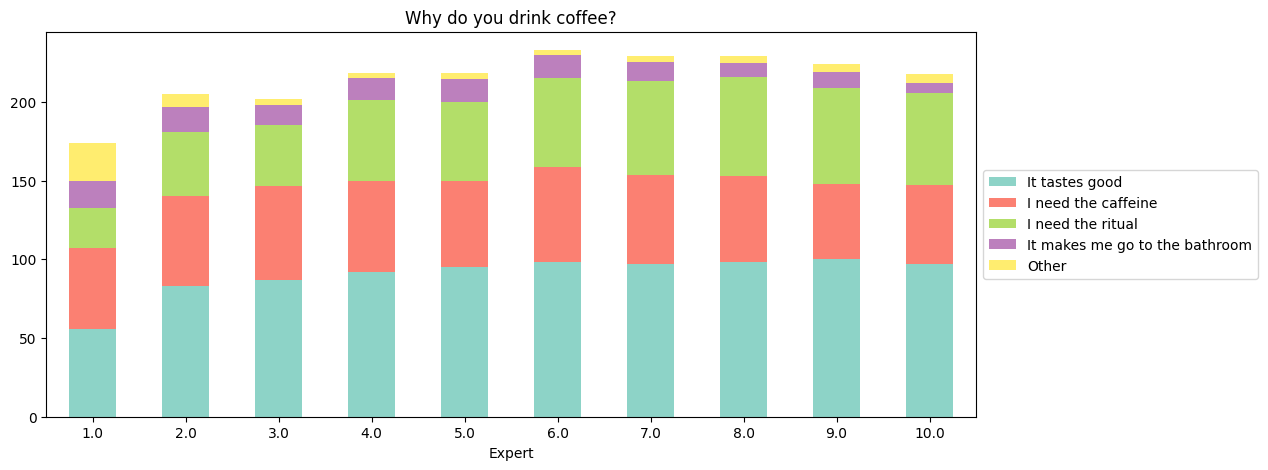

In [17]:
barplot_percent_stacked_multichoice(df, "Why do you drink coffee?", colormap="Set3")

#Monetary questions

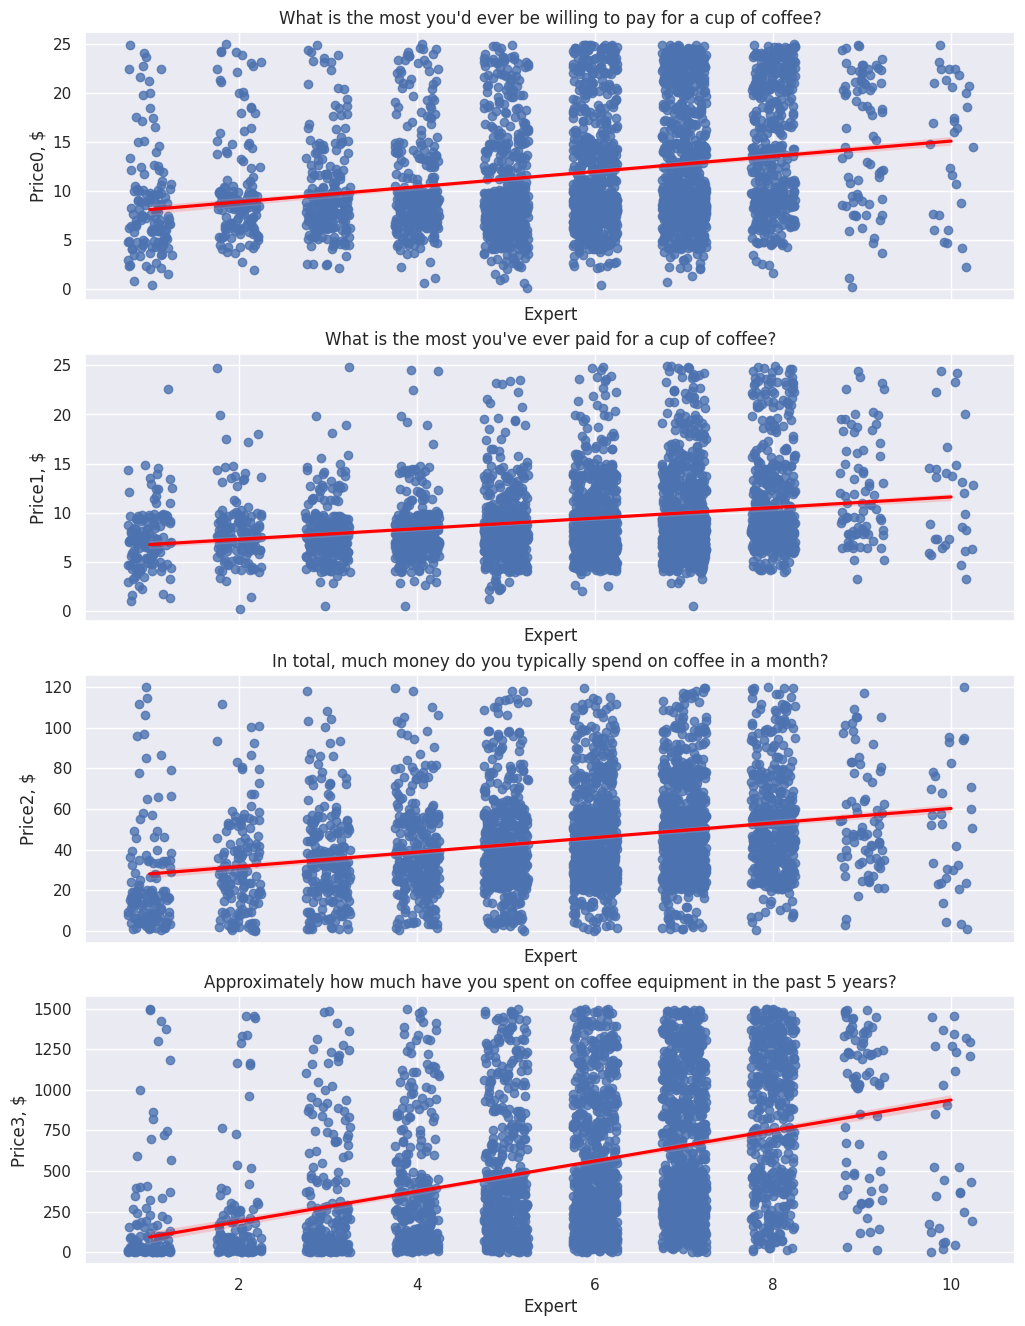

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

questions = ["What is the most you'd ever be willing to pay for a cup of coffee?",
             "What is the most you've ever paid for a cup of coffee?",
             "In total, much money do you typically spend on coffee in a month?",
             "Approximately how much have you spent on coffee equipment in the past 5 years?"
             ]
mapping = [{
    "Less than $2": [0, 2],
    "$2-$4": [2, 4],
    "$4-$6": [4, 6],
    "$6-$8": [6, 8],
    "$8-$10": [8, 10],
    "$10-$15": [10, 15],
    "$15-$20": [15, 20],
    "More than $20": [20, 25]
}, {
    "Less than $2": [0, 2],
    "$2-$4": [2, 4],
    "$4-$6": [4, 6],
    "$6-$8": [6, 8],
    "$8-$10": [8, 10],
    "$10-$15": [10, 15],
    "$15-$20": [15, 20],
    "More than $20": [20, 25]
},
    {
    "<$20": [0, 20],
    "$20-$40": [20, 40],
    "$40-$60": [40, 60],
    "$60-$80": [60, 80],
    "$80-$100": [80, 100],
    ">$100": [100, 120],
},
 {"Less than $20": [0, 20],
  "$20-$50": [20, 50],
  "$50-$100": [50, 100],
  "$100-$300": [100, 300],
  "$300-$500": [300, 500],
  "$500-$1000": [500, 1000],
  "More than $1,000": [1000, 1500]
  }       ]
for i, question in enumerate(questions):
  df["Price" + str(i) + ", $"] = df[question].apply(lambda x: np.nan if pd.isnull(x) else np.random.uniform(mapping[i][x][0], mapping[i][x][1]))
x = "Lastly, how would you rate your own coffee expertise?"

df_p = df.rename({x: "Expert"}, axis=1)

fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
for i, question in enumerate(questions):
  sns.regplot(ax=axes[i], x="Expert", y='Price'+str(i) + ", $",data=df_p,fit_reg=True,
            line_kws={'color': 'red'}, x_jitter=0.25)
  axes[i].set_title(question)

# Yes-no questions by expertise + gender

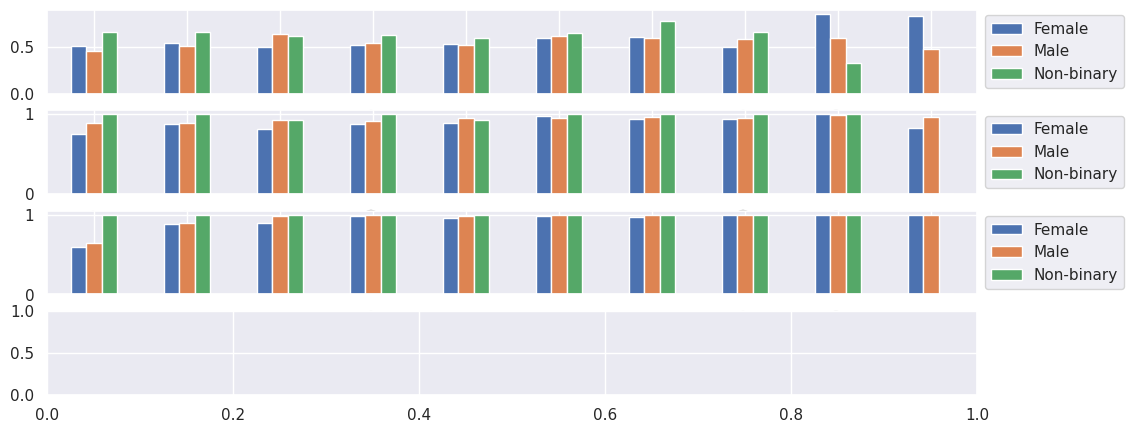

In [23]:
questions = [
    ("Do you feel like you’re getting good value for your money when you buy coffee at a cafe?", "With coffee at cafe"),
    ("Do you feel like you’re getting good value for your money with regards to your coffee equipment?", "With home equipment"),
    ("Do you like the taste of coffee?", "With coffee taste"),
]
df = df.loc[df.Gender.isin(["Male", "Female", "Non-binary"])]

for q in questions:
   df[q[1]] = df[q[0]] == "Yes"

questions_binary = [q[1] for q in questions]

predictors = [
    "Lastly, how would you rate your own coffee expertise?"
]


fig, axes = plt.subplots(nrows=4, ncols=1)
for i, qb in enumerate(questions_binary):
  df_p = pd.pivot_table(
      data = df,
      index="Lastly, how would you rate your own coffee expertise?",
      columns="Gender",
      values=qb,
      aggfunc="mean"
  )
  df_p.plot(kind="bar", ax=axes[i], figsize=(12, 5))\
  .legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

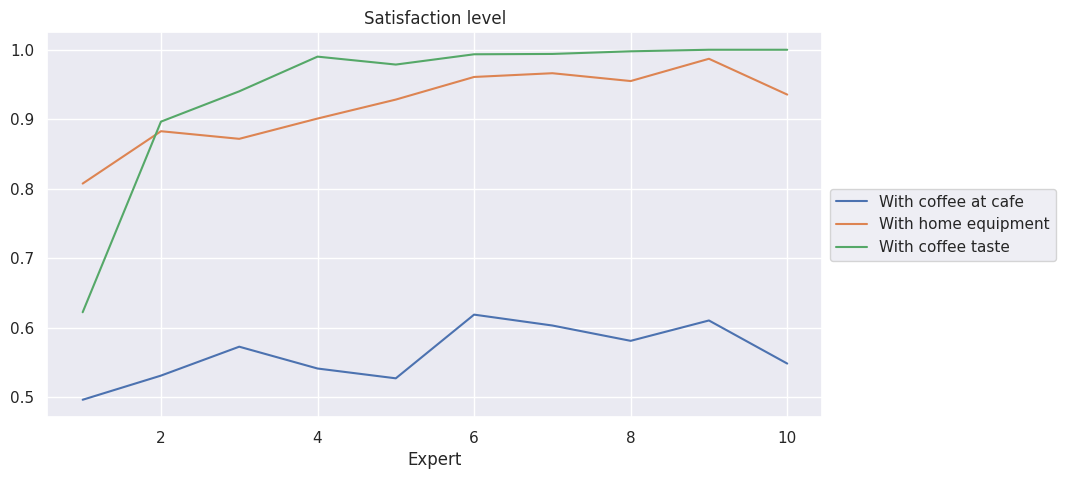

In [24]:
df_p = df[predictors + questions_binary ].groupby(predictors).mean()
df_p.plot(xlabel="Expert", title = "Satisfaction level", figsize=(10,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));